In [1]:
from loadmodules import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [6]:
sim = './isolated_gal/auriga_ism'
%matplotlib inline

phiP = 3
Gcosmo = 43018.7

In [7]:
s = gadget_readsnap(30, snappath=sim+'/output/', loadonlytype=[0], applytransformationfacs=True, hdf5=True)

In [8]:
nshells = 200
surfdens_prof = np.zeros(nshells)
pres_prof = np.zeros(nshells)
radial_bins = np.linspace(0, 50, nshells+1)
r = 0.5 * (radial_bins[1:] + radial_bins[:-1])
r_xy = np.sqrt((s.data['pos'][:, 1] - s.parameters['BoxSize']/2.)**2 + (s.data['pos'][:, 0] - s.parameters['BoxSize']/2.)**2)

for i in range(nshells):
    mask = np.where((r_xy >= radial_bins[i]) & (r_xy < radial_bins[i+1]))
    surfdens_prof[i] = np.sum(s.data['mass'][mask])/ (np.pi * (radial_bins[i+1]**2 - radial_bins[i]**2))
    pres_prof[i] = np.mean(s.data['pres'][mask])#/ (np.pi * (radial_bins[i+1]**2 - radial_bins[i]**2))

In [9]:
# Mid-plane pressure profile (Krumholz & McKee 2005)
P_mp_radprof = phiP * np.pi/2 * Gcosmo * surfdens_prof**2

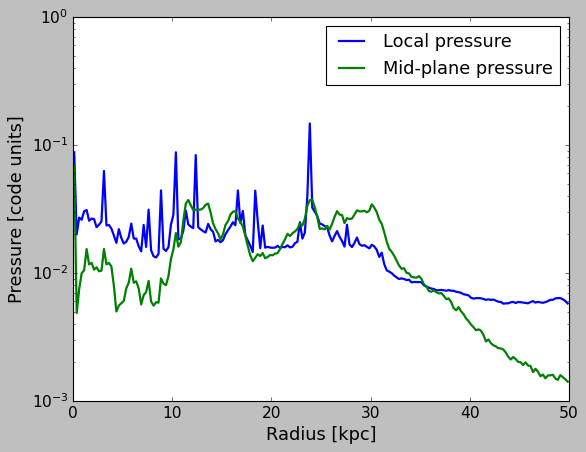

In [10]:
plt.semilogy(r, pres_prof, linewidth=2 ,label='Local pressure')
plt.semilogy(r, P_mp_radprof, linewidth=2 ,label='Mid-plane pressure')
plt.legend(fontsize=16)
plt.xlabel('Radius [kpc]', fontsize=16)
plt.ylabel('Pressure [code units]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)